epoch number:  1
learning rate: 0.0002000000


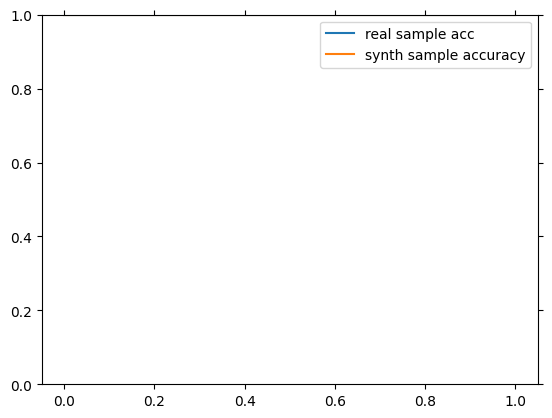

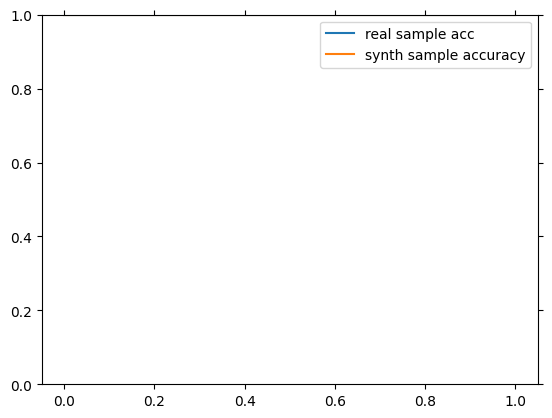

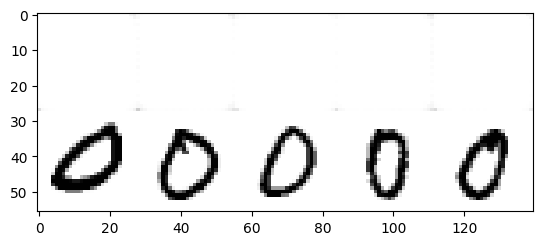

>>> saving intermediate model


INFO:tensorflow:Assets written to: None_temp_generator_epoch_1_1.00_1.00.model/assets


INFO:tensorflow:Assets written to: None_temp_generator_epoch_1_1.00_1.00.model/assets


INFO:tensorflow:Assets written to: None_temp_discriminator_epoch_1_1.00_1.00.model/assets


INFO:tensorflow:Assets written to: None_temp_discriminator_epoch_1_1.00_1.00.model/assets


INFO:tensorflow:Assets written to: None_temp_gan_epoch_1_1.00_1.00.model/assets


INFO:tensorflow:Assets written to: None_temp_gan_epoch_1_1.00_1.00.model/assets


hello


In [1]:
import sys
#sys.path.append('/Users/uri.almog/tsubu/GAN-main/')
import models
from models import deep_model
from models import gan_class
from models.gan_class import GAN

import pandas as pd
import io
import datetime as dt
from IPython.display import FileLink
import datetime
from datetime import datetime, timedelta, date
import numpy as np
import warnings 

from tqdm import tqdm

pd.set_option("display.max_columns", None)

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
#import plotly.express as px

import tensorflow as tf
from tensorflow.keras.optimizers import SGD

import sklearn
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

#import graphviz

import pickle

from ipywidgets import IntProgress
from IPython.display import display
import time

from IPython.display import display, clear_output

import requests

requests.packages.urllib3.disable_warnings()
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context



mnist_train, mnist_test = tf.keras.datasets.mnist.load_data('mnist.npz')


mnist_train_vectors, mnist_train_labels = mnist_train
mnist_train_vectors, mnist_train_labels = mnist_train

ind_array = np.arange(len(mnist_train_vectors))

mnist_train_indices_label_8 = np.where(mnist_train_labels == 8)
mnist_train_vectors_8 = mnist_train_vectors[mnist_train_indices_label_8]
ind_array_label_8 = np.arange(len(mnist_train_vectors_8))

mnist_train_indices_label_0 = np.where(mnist_train_labels == 0)
mnist_train_vectors_0 = mnist_train_vectors[mnist_train_indices_label_0]
ind_array_label_0 = np.arange(len(mnist_train_vectors_0))

mnist_train_indices_label_2 = np.where(mnist_train_labels == 2)
mnist_train_vectors_2 = mnist_train_vectors[mnist_train_indices_label_2]
ind_array_label_2 = np.arange(len(mnist_train_vectors_2))

mnist_train_indices_label_1 = np.where(mnist_train_labels == 1)
mnist_train_vectors_1 = mnist_train_vectors[mnist_train_indices_label_1]
ind_array_label_1 = np.arange(len(mnist_train_vectors_1))


plt.imshow(mnist_train_vectors[mnist_train_indices_label_8[0][45]].reshape(28,28))


pd.options.display.max_seq_items = 2000


latent_dim = 100
output_dim = (28, 28, 1)


#source for mnist gan architecture:
#https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/

# size of the latent space

mygan = GAN(isplot=True,
            lr=0.0002,
            decay_rate=0.9)

# create the discriminator
type(mnist_train_vectors_0.shape)
mygan.set_batches_per_epoch(dataset=mnist_train_vectors_2,
                            batch_size=256)

mygan.define_discriminator(output_dim,
                           [{'type':'Conv', 'filters':64 , 'activation':'LeakyReLU', 'kernel':(3, 3), 'kernel_reg':None,'strides': (2, 2), 'padding':'same', 'use_bias':True, 'input_shape':output_dim},
                            {'type':'dropout', 'rate':0.4},
                            {'type':'Conv', 'filters':64, 'activation':'LeakyReLU', 'kernel':(3, 3), 'kernel_reg':None, 'strides':(2, 2), 'padding':'same', 'use_bias':True},
                            {'type':'dropout', 'rate':0.4},
                            {'type':'flatten'},
                            {'type':'Dense', 'nodes':1, 'activation':'sigmoid', 'use_bias':True}])
# create the generator
mygan.define_generator(latent_dim,
                       [{'type':'Dense', 'nodes':7*7*128, 'activation':'LeakyReLU', 'use_bias':False},
                        {'type':'Reshape', 'newshape':[7, 7, 128]},
                        {'type':'Deconv', 'filters':128, 'kernel': (4, 4), 'strides': (2, 2), 'use_bias': False, 'padding': 'same', 'activation':'LeakyReLu'},
                        {'type':'Deconv', 'filters':128, 'kernel': (4, 4), 'strides': (2, 2), 'use_bias': False, 'padding': 'same', 'activation':'linear'},
                        {'type':'leakyrelu'},
                        {'type':'Conv', 'filters':1, 'kernel': (7, 7), 'kernel_reg':None, 'strides': (1, 1), 'use_bias': False, 'padding': 'same', 'activation':'sigmoid'}])



# create the gan
gan_model = mygan.define_gan()

print(mygan.discriminator.summary())
print(mygan.generator.summary())



# train model
mygan.train(mnist_train_vectors, 
            n_epochs=2, 
            n_batch=256,  
            n_eval=1)


if __name__ == "__main__":
    print('hello')

